In [16]:
%matplotlib inline
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd

iris = datasets.load_iris()

df = pd.DataFrame(data = np.c_[iris['data'],iris['target']], columns = iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


/home/samyak/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/samyak/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/samyak/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/samyak/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

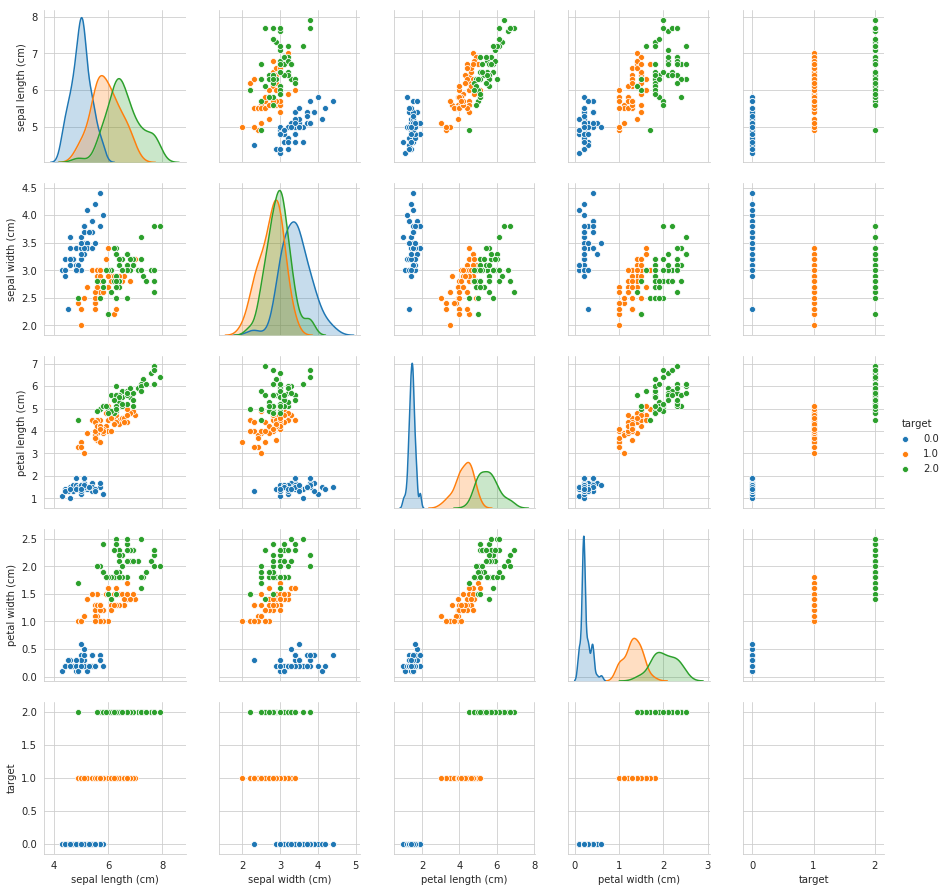

In [6]:
sns.set_style('whitegrid')
sns.pairplot(df,hue = 'target')

In [18]:
X = iris.data[0:150, :]
X.shape

(150, 4)

In [19]:
Y = iris.target[0:150]
Y.shape

(150,)

In [20]:
setosa_index = rnd.randrange(0,49)
test_setosa = [iris.data[setosa_index, :]]
X = np.delete(X,setosa_index, 0)
Y = np.delete(Y,setosa_index,0)
test_setosa, iris.target_names[iris.target[setosa_index]], X.shape, Y.shape

([array([5.5, 3.5, 1.3, 0.2])], 'setosa', (149, 4), (149,))

In [21]:
virginica_index = rnd.randrange(100,150)
test_virginica = [iris.data[virginica_index, :]]
X = np.delete(X,virginica_index, 0)
Y = np.delete(Y,virginica_index,0)
test_virginica, iris.target_names[iris.target[virginica_index]], X.shape, Y.shape

([array([5.6, 2.8, 4.9, 2. ])], 'virginica', (148, 4), (148,))

In [22]:
versicolor_index = rnd.randrange(50,99)
test_versicolor = [iris.data[versicolor_index, :]]
X = np.delete(X,versicolor_index, 0)
Y = np.delete(Y,versicolor_index,0)
test_versicolor, iris.target_names[iris.target[versicolor_index]], X.shape, Y.shape

([array([7. , 3.2, 4.7, 1.4])], 'versicolor', (147, 4), (147,))

In [24]:
model_tree = tree.DecisionTreeClassifier()

model_tree.fit(X,Y)

pred_tree_setosa = model_tree.predict(test_setosa)

print('Decision Tree predicts {} for test_setosa'
     .format(iris.target_names[pred_tree_setosa]))

Decision Tree predicts ['setosa'] for test_setosa


In [26]:
pred_tree_virginica = model_tree.predict(test_virginica)

print('Decision Tree predicts {} for test_virginica'
     .format(iris.target_names[pred_tree_virginica]))

Decision Tree predicts ['virginica'] for test_virginica


In [27]:
pred_tree_versicolor = model_tree.predict(test_versicolor)

print('Decision Tree predicts {} for test_versicolor'
     .format(iris.target_names[pred_tree_versicolor]))

Decision Tree predicts ['versicolor'] for test_versicolor


In [28]:
y = df['target']
x = df[['petal length (cm)', 'petal width (cm)']]

from sklearn import tree, metrics, model_selection, preprocessing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree.fit(x_train,y_train)

y_pred = dtree.predict(x_test)

In [30]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: {: .2f}'.format(accuracy))

Misclassified samples: 1
Accuracy:  0.98


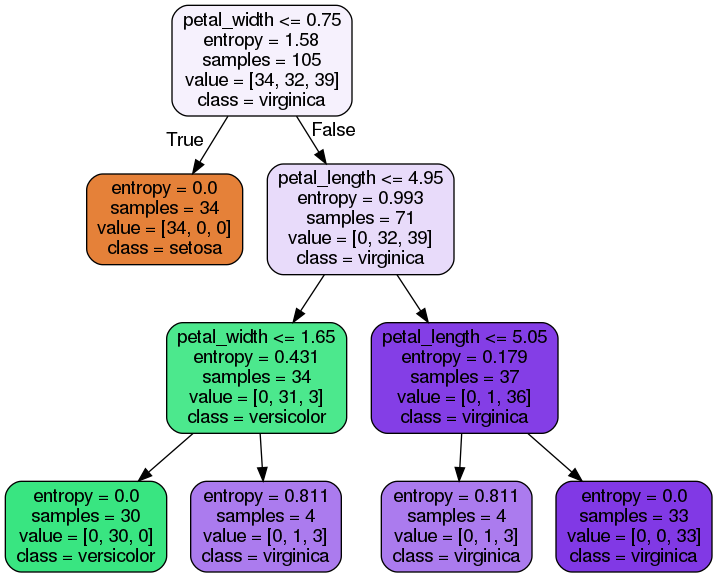

In [33]:
from IPython.display import Image, display
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                               feature_names = ['petal_length','petal_width'],
                               class_names=['setosa','versicolor','virginica'])

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))